# Building Equation of logistic regreession from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.e**-x)

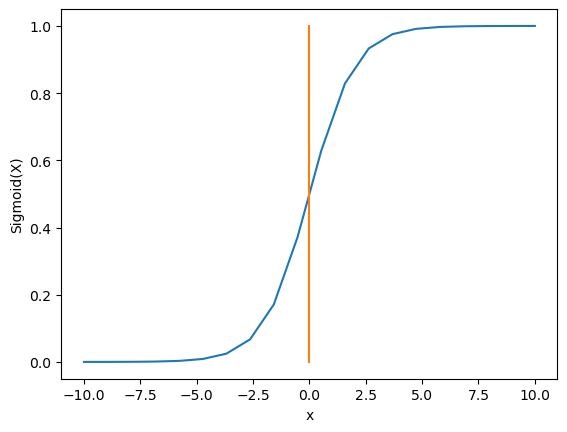

In [3]:
import math

x = np.linspace(-10,10,20)
z = sigmoid(x)

plt.plot(x, z)
plt.plot(np.zeros(6), [0,0.2,0.4,0.6,0.8,1])
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

In [4]:
a = np.array([[2,3],[4,1],[5,4],[8,8],[9,1],[2,6]])
b = np.array([0,0,1,1,0,1])


df = pd.DataFrame(a, columns = ["x1", "x2"])
df["y"] = b
df

,x1,x2,y
0,2,3,0
1,4,1,0
2,5,4,1
3,8,8,1
4,9,1,0
5,2,6,1


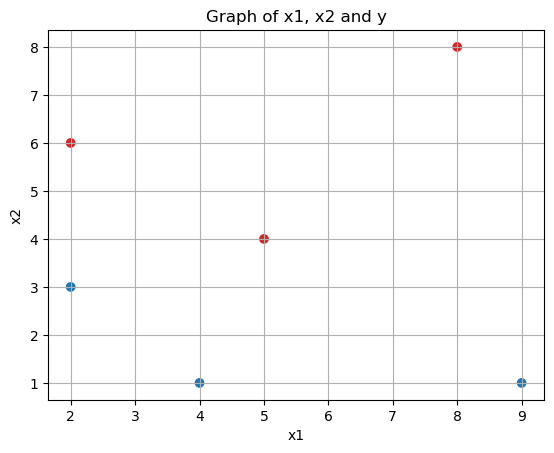

In [5]:

colors = {0: "tab:blue", 1:"tab:red"}

plt.scatter(a[:,0],a[:,1],c = df["y"].map(colors))
plt.title("Graph of x1, x2 and y")
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

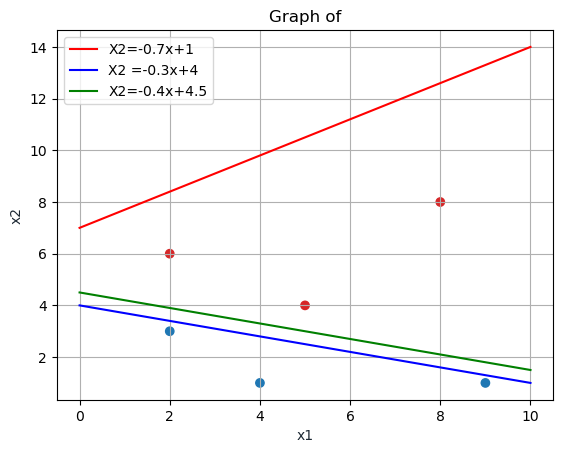

In [6]:
x = np.linspace(0,10,200)
plt.scatter(a[:,0],a[:,1], c = df["y"].map(colors))

y = 0.7*x+7
plt.plot(x,y, '-r', label = 'X2=-0.7x+1')

y = -0.3*x + 4
plt.plot(x, y, '-b', label = "X2 =-0.3x+4")

y = -0.3*x+4.5
plt.plot(x,y,'-g', label = "X2=-0.4x+4.5")
plt.title('Graph of')
plt.xlabel('x1', color = '#1C2833')
plt.ylabel('x2', color = '#1C2833')
plt.legend(loc = "upper left")
plt.grid()
plt.show()

In [7]:
def sigmoid(x):
    return 1/(1 + np.e**-x)

def Negloglikelihood(y, yhat):
    return -(np.log(yhat) * y + np.log(1 - yhat) * (1 - y))

In [8]:
df['x2_green'] = -0.3*df['x1'] + 4.5
df['x2_blue'] = -0.3*df['x1'] + 4
df['x2_red'] = 0.7*df['x1'] + 2

df['dist_green'] = df['x2'] - df['x2_green']
df['dist_blue'] = df['x2'] - df['x2_blue']
df['dist_red'] = df['x2'] - df['x2_red']


df['prob_green'] = sigmoid(df['dist_green'])
df['prob_blue'] = sigmoid(df['dist_blue'])
df['prob_red'] = sigmoid(df['dist_red'])

df['loglike_green'] = Negloglikelihood(df['y'],df['prob_green'])
df['loglike_blue'] = Negloglikelihood(df['y'],df['prob_blue'])
df['loglike_red'] = Negloglikelihood(df['y'],df['prob_red'])
  
print(sum(df['loglike_green']))
print(sum(df['loglike_blue']))
print(sum(df['loglike_red']))





1.2393169153543424
1.4950662557590215
2.821888001906791


In [9]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*2))

def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

In [10]:
def error(X, y, theta):
    hypo = hypothesis(X, theta)
    err = np.mean((y*np.log(hypo) + (1-y)*np.log(1-hypo)))
    
    return -err

In [11]:
def gradient(X, y, theta):
    
    '''
    X - (m,n)
    y - (m,1)
    
    theta - (n,1)
    
    return (n,1)
    '''
    
    hypo = hypothesis(X, theta)
    grad = (np.dot(X.T, (hypo - y)))
    return grad/X.shape[0]

# Classification on dataset using model

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 500,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 5)

In [13]:
X.shape

(500, 2)

In [14]:
def gradient_descent(X, y, lr = 0.5, max_itr = 10):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    
    for _ in range(max_itr):
        e = error(X, y, theta)
        error_list.append(e)
        
        grad = gradient(X, y, theta)
        
        theta = theta - lr*grad
        
    return (theta, error_list)

In [15]:
theta = np.zeros((X.shape[1], 1))
theta

array([[0.],
       [0.]])

In [16]:
X.shape

(500, 2)

In [17]:
y.shape

(500,)

In [18]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

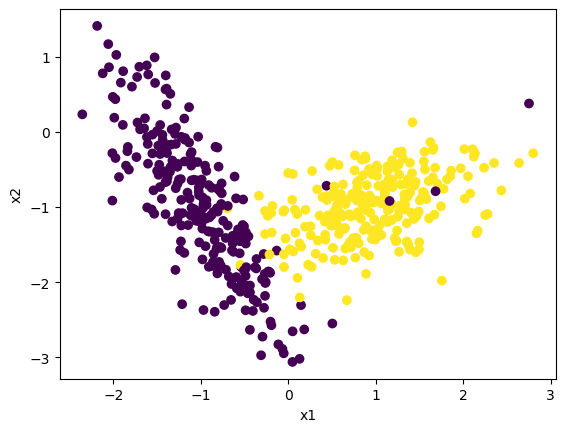

In [19]:
plt.scatter(X[:, 0],X[:,1], c =y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [20]:
ones = np.ones((500,1))
X_ = np.hstack((ones,X))
X_[:5]

array([[ 1.        ,  1.22167239, -0.4757541 ],
       [ 1.        , -0.2292072 , -1.85663378],
       [ 1.        , -1.34913896,  0.50458721],
       [ 1.        ,  0.31402206, -1.62029248],
       [ 1.        ,  1.13807877, -0.99148158]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.2, random_state = 42)

In [22]:
opt_theta, error_list = gradient_descent(X_train, y_train)

In [23]:
opt_theta

array([[-1.94148539,  2.47265901,  1.86370922],
       [-1.94148539,  2.47265901,  1.86370922],
       [-1.94148539,  2.47265901,  1.86370922]])

## Train the model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logistic = LogisticRegression()

In [26]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [27]:
logistic.intercept_

array([1.47191488])

In [28]:
logistic.coef_

array([[-1.47624739e-03,  3.89638974e+00,  8.51637292e-01]])

In [29]:
y_pred = logistic.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
confusion_matrix(y_test, y_pred)

array([[47,  3],
       [ 2, 48]], dtype=int64)

In [32]:
   accuracy_score(y_test, y_pred)

0.95

## Evaluation of accuracy of model

In [33]:
from sklearn.metrics import precision_score, recall_score

In [34]:
precision_score(y_test, y_pred)

0.9411764705882353

In [35]:
recall_score(y_test, y_pred)

0.96

In [36]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [37]:
 prob = logistic.predict_proba(X_test)

In [38]:
prob[1]

array([0.01820163, 0.98179837])